### Clusters practice

Fisrt of all, I am importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
from IPython.display import HTML, Image, display
import warnings
warnings.filterwarnings('ignore')

In [3]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#Data import
claims = pd.read_csv('claims.csv') 
car_details = pd.read_csv('car_details.csv')
sales = pd.read_csv('sales.csv') 

Let's take a look on the tables:

In [5]:
def overview(df_list):
    """Table info:"""
    for x, y in df_list:
        display(HTML('<h3>Table ' + y + '</h3>'))
        display(x.head())
        display(x.info())
        display(x.describe(datetime_is_numeric=True, include='all'))

In [6]:
dfs = [[claims, 'Claims'], [car_details, 'Car details'], [sales, 'Sales']]

In [7]:
overview(dfs)

,claim_id,car_id,full_refunds,partial_refunds,voucher_amount,voucher_unit,claim_status,free_transport,estimation_transport_cost
0,44,1058911,0,1,337.0,1.0,closed_fully_processed,no,NaN
1,99,1947497,0,1,8263.0,3.0,closed_fully_processed,yes,315.0
2,148,868642,0,1,5754.0,3.0,closed_refused,no,NaN
3,191,299667,0,1,50.0,1.0,closed_fully_processed,no,NaN
4,193,1099114,0,1,79.0,1.0,closed_refused,no,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   claim_id                   2266 non-null   int64  
 1   car_id                     2266 non-null   int64  
 2   full_refunds               2266 non-null   int64  
 3   partial_refunds            2266 non-null   int64  
 4   voucher_amount             2043 non-null   float64
 5   voucher_unit               2043 non-null   float64
 6   claim_status               2266 non-null   object 
 7   free_transport             2266 non-null   object 
 8   estimation_transport_cost  723 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 159.5+ KB


None

,claim_id,car_id,full_refunds,partial_refunds,voucher_amount,voucher_unit,claim_status,free_transport,estimation_transport_cost
count,2.266000e+03,2.266000e+03,2266.000000,2266.00000,2043.000000,2043.000000,2266,2266,723.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,closed_fully_processed,no,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1726,1543,NaN
mean,4.331778e+05,9.936797e+05,0.101942,0.90203,2577.407244,2.091532,NaN,NaN,796.192254
std,4.689431e+05,5.868272e+05,0.302638,0.29734,2921.790697,0.841470,NaN,NaN,462.417063
min,4.400000e+01,6.500000e+02,0.000000,0.00000,50.000000,1.000000,NaN,NaN,1.000000
25%,5.985050e+04,4.799032e+05,0.000000,1.00000,363.000000,1.000000,NaN,NaN,411.500000
50%,1.646785e+05,9.937365e+05,0.000000,1.00000,1342.000000,2.000000,NaN,NaN,789.000000
75%,7.675558e+05,1.512156e+06,0.000000,1.00000,3985.500000,3.000000,NaN,NaN,1191.500000


,car_id,road_worthy,ac_type,fuel_type,gear_type,car_preowner_count,has_diesel_particulate_filter,outside_colour,has_airbags,has_alarm_system,has_abs,xenon_light,navigation_system,radio_system,has_metallic_color,has_tuning
0,640872,1,1050,1040,1139,0,1,1061,1,0,1,0,1100,1104,1,0
1,951649,1,1049,0,0,1,1,1060,1,0,1,0,0,1104,1,0
2,1154665,1,1049,1039,1139,0,0,1060,1,1,1,1089,1100,3534,1,0
3,847230,1,1050,1040,1141,0,1,1059,1,0,1,0,1100,1104,1,0
4,311429,1,3535,1040,1141,1,1,1065,0,0,0,0,1100,3534,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   car_id                         6544 non-null   int64
 1   road_worthy                    6544 non-null   int64
 2   ac_type                        6544 non-null   int64
 3   fuel_type                      6544 non-null   int64
 4   gear_type                      6544 non-null   int64
 5   car_preowner_count             6544 non-null   int64
 6   has_diesel_particulate_filter  6544 non-null   int64
 7   outside_colour                 6544 non-null   int64
 8   has_airbags                    6544 non-null   int64
 9   has_alarm_system               6544 non-null   int64
 10  has_abs                        6544 non-null   int64
 11  xenon_light                    6544 non-null   int64
 12  navigation_system              6544 non-null   int64
 13  radio_system      

None

,car_id,road_worthy,ac_type,fuel_type,gear_type,car_preowner_count,has_diesel_particulate_filter,outside_colour,has_airbags,has_alarm_system,has_abs,xenon_light,navigation_system,radio_system,has_metallic_color,has_tuning
count,6.544000e+03,6544.0,6.544000e+03,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.000000,6544.00000,6544.000000,6.544000e+03,6.544000e+03,6544.000000,6544.000000
mean,1.004337e+06,1.0,3.918923e+06,1015.368735,1114.746638,1.135544,0.513753,1060.633099,0.819377,0.279187,0.94621,436.284841,3.216292e+06,2.067195e+06,0.842145,0.054401
std,5.806757e+05,0.0,8.216041e+07,157.118059,164.234994,1.377355,0.499849,18.678895,0.384735,0.448634,0.22562,533.634037,7.514301e+07,5.689153e+07,0.364632,0.226825
min,6.500000e+02,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.004745e+05,1.0,1.050000e+03,1039.000000,1138.000000,0.000000,0.000000,1059.000000,1.000000,0.000000,1.00000,0.000000,0.000000e+00,1.104000e+03,1.000000,0.000000
50%,1.013458e+06,1.0,1.050000e+03,1040.000000,1139.000000,1.000000,1.000000,1060.000000,1.000000,0.000000,1.00000,0.000000,1.100000e+03,1.104000e+03,1.000000,0.000000
75%,1.505712e+06,1.0,1.050000e+03,1040.000000,1139.000000,1.000000,1.000000,1062.000000,1.000000,1.000000,1.00000,1089.000000,1.100000e+03,1.106000e+03,1.000000,0.000000
max,1.999901e+06,1.0,1.942299e+09,1048.000000,1141.000000,16.000000,1.000000,1071.000000,1.000000,1.000000,1.00000,1090.000000,1.942299e+09,1.735594e+09,1.000000,1.000000


,merchant_id,country,car_id,selling_date,payment_date,sell_price,transport_to_merchant,transport_date
0,4241,FR,624452,4/28/2020,5/3/2020,18088,1,5/5/2020
1,5726,DE,310588,4/11/2020,4/19/2020,16305,1,4/22/2020
2,815,DE,1503491,9/8/2018,9/16/2018,30557,1,9/24/2018
3,4392,DE,1132346,8/14/2019,8/21/2019,13978,1,8/24/2019
4,1695,DE,1395359,9/17/2019,9/24/2019,17878,1,10/1/2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   merchant_id            6544 non-null   int64 
 1   country                6544 non-null   object
 2   car_id                 6544 non-null   int64 
 3   selling_date           6544 non-null   object
 4   payment_date           6544 non-null   object
 5   sell_price             6544 non-null   int64 
 6   transport_to_merchant  6544 non-null   int64 
 7   transport_date         6544 non-null   object
dtypes: int64(4), object(4)
memory usage: 409.1+ KB


None

,merchant_id,country,car_id,selling_date,payment_date,sell_price,transport_to_merchant,transport_date
count,6544.000000,6544,6.544000e+03,6544,6544,6544.000000,6544.000000,6544
unique,NaN,6,NaN,765,772,NaN,NaN,775
top,NaN,DE,NaN,4/11/2020,12/20/2018,NaN,NaN,1/21/2019
freq,NaN,2672,NaN,19,20,NaN,NaN,20
mean,3145.947586,NaN,1.004395e+06,NaN,NaN,18433.008405,0.792023,NaN
std,1823.830290,NaN,5.797496e+05,NaN,NaN,10531.944029,0.405891,NaN
min,4.000000,NaN,6.270000e+02,NaN,NaN,4.000000,0.000000,NaN
25%,1568.000000,NaN,5.013202e+05,NaN,NaN,9495.000000,1.000000,NaN
50%,3110.500000,NaN,1.013536e+06,NaN,NaN,18394.000000,1.000000,NaN
75%,4729.000000,NaN,1.501961e+06,NaN,NaN,27496.250000,1.000000,NaN


In [8]:
#Columns of each table:
print(car_details.columns)
print(claims.columns)
print(sales.columns)

Index(['car_id ', 'road_worthy', 'ac_type', 'fuel_type', 'gear_type',
       'car_preowner_count', 'has_diesel_particulate_filter', 'outside_colour',
       'has_airbags', 'has_alarm_system', 'has_abs', 'xenon_light',
       'navigation_system', 'radio_system', 'has_metallic_color',
       'has_tuning'],
      dtype='object')
Index(['claim_id', 'car_id', 'full_refunds', 'partial_refunds',
       'voucher_amount', 'voucher_unit', 'claim_status', 'free_transport',
       'estimation_transport_cost'],
      dtype='object')
Index(['merchant_id ', 'country', 'car_id', 'selling_date', 'payment_date',
       'sell_price', 'transport_to_merchant', 'transport_date'],
      dtype='object')


##### First observations:
- Not every one used vouchers in Claims table as there are some null cells
- In Car details number of unique cars is less than the numer of lines in the Table, so there are dublicates of some cars.
- Dates in Sales are identified as "object" type, so it should be changed to "datetime" in order to be able to analyse timeframes.
- All necessary figures are "int" type and would be analyzed properly

In [9]:
#Date format
from datetime import datetime, timedelta, time

sales.selling_date = pd.to_datetime(sales.selling_date, format = '%m/%d/%Y')
sales.payment_date = pd.to_datetime(sales.payment_date, format = '%m/%d/%Y')
sales.transport_date = pd.to_datetime(sales.transport_date, format = '%m/%d/%Y')

In [10]:
#doublecheck
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   merchant_id            6544 non-null   int64         
 1   country                6544 non-null   object        
 2   car_id                 6544 non-null   int64         
 3   selling_date           6544 non-null   datetime64[ns]
 4   payment_date           6544 non-null   datetime64[ns]
 5   sell_price             6544 non-null   int64         
 6   transport_to_merchant  6544 non-null   int64         
 7   transport_date         6544 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(1)
memory usage: 409.1+ KB


### Perform a clustering of cars and present a business conclusion based on the data that you have.

Cars have dublicates in car_details table so first we should eliminate those to perform more accurate analysis.

In [11]:
print(car_details['car_id '].count())
print(car_details['car_id '].nunique())

6544
6012


In [12]:
car_details_no_dubl = car_details.drop_duplicates(subset ='car_id ',keep ='first')
print(car_details_no_dubl['car_id '].count())
print(car_details_no_dubl['car_id '].nunique())

6012
6012


In [13]:
claims.head()

,claim_id,car_id,full_refunds,partial_refunds,voucher_amount,voucher_unit,claim_status,free_transport,estimation_transport_cost
0,44,1058911,0,1,337.0,1.0,closed_fully_processed,no,NaN
1,99,1947497,0,1,8263.0,3.0,closed_fully_processed,yes,315.0
2,148,868642,0,1,5754.0,3.0,closed_refused,no,NaN
3,191,299667,0,1,50.0,1.0,closed_fully_processed,no,NaN
4,193,1099114,0,1,79.0,1.0,closed_refused,no,NaN


In [14]:
car_details.head()

,car_id,road_worthy,ac_type,fuel_type,gear_type,car_preowner_count,has_diesel_particulate_filter,outside_colour,has_airbags,has_alarm_system,has_abs,xenon_light,navigation_system,radio_system,has_metallic_color,has_tuning
0,640872,1,1050,1040,1139,0,1,1061,1,0,1,0,1100,1104,1,0
1,951649,1,1049,0,0,1,1,1060,1,0,1,0,0,1104,1,0
2,1154665,1,1049,1039,1139,0,0,1060,1,1,1,1089,1100,3534,1,0
3,847230,1,1050,1040,1141,0,1,1059,1,0,1,0,1100,1104,1,0
4,311429,1,3535,1040,1141,1,1,1065,0,0,0,0,1100,3534,1,0


In [15]:
sales.head()

,merchant_id,country,car_id,selling_date,payment_date,sell_price,transport_to_merchant,transport_date
0,4241,FR,624452,2020-04-28,2020-05-03,18088,1,2020-05-05
1,5726,DE,310588,2020-04-11,2020-04-19,16305,1,2020-04-22
2,815,DE,1503491,2018-09-08,2018-09-16,30557,1,2018-09-24
3,4392,DE,1132346,2019-08-14,2019-08-21,13978,1,2019-08-24
4,1695,DE,1395359,2019-09-17,2019-09-24,17878,1,2019-10-01


So we have three tables of info about all the claims, car_details and all the sales. The clustering analysis can be performed only with numeric data thus we can choose wihich columns we can use to make informative conclusions.
From claims I would choose the number of voucher_units and calculated full sum of vouchers.
As in the table with car details there are a lot of unnecessary figures which can't give us valuable info I would leave car preowner count and airbags as it is an important feature.
From sales I would take sell price only.

In [16]:
new_claims = claims[['car_id','voucher_unit']]
new_claims['voucher_unit'] = new_claims['voucher_unit'].fillna('0')
new_claims['sum_vouchers'] = claims['voucher_amount']*claims['voucher_unit']
new_claims['sum_vouchers'] = new_claims['sum_vouchers'].fillna('0')
new_claims

,car_id,voucher_unit,sum_vouchers
0,1058911,1,337
1,1947497,3,24789
2,868642,3,17262
3,299667,1,50
4,1099114,1,79
...,...,...,...
2261,232512,3,11601
2262,635545,3,6846
2263,1925458,0,0
2264,169985,3,37917


In [17]:
new_cars = car_details[['car_id ', 'car_preowner_count','has_airbags']]
new_cars

,car_id,car_preowner_count,has_airbags
0,640872,0,1
1,951649,1,1
2,1154665,0,1
3,847230,0,1
4,311429,1,0
...,...,...,...
6539,1958988,2,0
6540,1181046,1,1
6541,1156097,1,1
6542,507065,1,1


In [18]:
new_sales = sales[['car_id', 'sell_price']]
new_sales

,car_id,sell_price
0,624452,18088
1,310588,16305
2,1503491,30557
3,1132346,13978
4,1395359,17878
...,...,...
6539,730213,6234
6540,1547548,1265
6541,650445,16704
6542,678895,110


In [19]:
#there is a problem with car_id column in car_details, so I am renaming them to be able to merge.
new_cars = new_cars.rename(columns = {'car_id ': 'carid'})
new_claims = new_claims.rename(columns = {'car_id': 'carid'})
new_sales = new_sales.rename(columns = {'car_id': 'carid'})

In [20]:
#mergeing the tables
merged = new_cars.merge(new_claims, on = 'carid', how = 'inner')
all_info = merged.merge(new_sales, on = 'carid', how = 'inner')
all_info.head()

,carid,car_preowner_count,has_airbags,voucher_unit,sum_vouchers,sell_price
0,1112430,1,1,2,3470,26842
1,1784767,1,1,3,26151,28791
2,146062,0,1,3,26973,29022
3,463533,0,0,3,10062,29128
4,930992,1,1,3,14466,29132


In [21]:
all_info['voucher_unit'] = all_info['voucher_unit'].astype(int)
all_info['sum_vouchers'] = all_info['sum_vouchers'].astype(int)

In [22]:
X = all_info.values[:,1:]
X = np.nan_to_num(X)
X

array([[    1,     1,     2,  3470, 26842],
       [    1,     1,     3, 26151, 28791],
       [    0,     1,     3, 26973, 29022],
       ...,
       [    2,     0,     0,     0,   720],
       [    1,     1,     3, 25347, 30701],
       [    0,     1,     3, 14439, 17503]], dtype=int64)

In [23]:
#Now defining the cluster, I would start with amount of 4
clusternum = 4
k_means = KMeans(init = 'k-means++', n_clusters = clusternum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [24]:
#placing the clusters into our dataframe
all_info['Clus_km'] = labels
all_info.head()

,carid,car_preowner_count,has_airbags,voucher_unit,sum_vouchers,sell_price,Clus_km
0,1112430,1,1,2,3470,26842,3
1,1784767,1,1,3,26151,28791,0
2,146062,0,1,3,26973,29022,0
3,463533,0,0,3,10062,29128,3
4,930992,1,1,3,14466,29132,0


In [25]:
#Grouping Dataframe by clusters
all_info.groupby('Clus_km').mean()

,carid,car_preowner_count,has_airbags,voucher_unit,sum_vouchers,sell_price
Clus_km,,,,,,
0,9.664482e+05,1.007353,0.818627,3.000000,22657.757353,28136.154412
1,9.940601e+05,1.509063,0.785498,1.354985,1299.182779,5362.413897
2,9.664856e+05,1.004354,0.847605,1.950653,4969.545718,16199.547170
3,1.043646e+06,0.932540,0.863095,1.634921,2729.081349,29995.184524


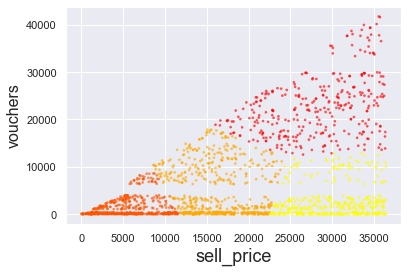

In [26]:
area = np.pi*(X[:,1])**2
plt.scatter(X[:,4], X[:,3], s = area, c = labels.astype(np.float), alpha=0.5, cmap = 'autumn')
plt.xlabel('sell_price', fontsize = 18)
plt.ylabel('vouchers', fontsize = 16)
plt.show()

We can conduct the analysis of our info from very different aspects. Here I have chosen to find the connection between the sum of all vouchers and the selling price for cars. As we can see from the scatter plot the more is the voucher budget the more is the selling price. Also in the table we can see the connection between the number of voucher units and the selling price. So I can conclude that gift cards stimulate to buy people more.
Also as I have included the airbags (which is actually a boolean type) I can say from the table that it doesn't really have an impact on the selling price. But if we take a look at the amount of the car pre-owners there is an interesting connection - the more preowners a car has the less is the selling price.